In [9]:
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# plotMatriz
import itertools


import warnings
warnings.filterwarnings("ignore")

NOTAS: 

Trabalho Prático: 

Começar com dicionário grande --> Treinar Discriminante Logístico --> 
Ver valores dos w --> Eliminar entradas do dicionário cujos w=0

Comparar esses resultados com resultados de um dicionário com aproximadamente as mesmas dimensões
Comparar resultados com resultados com max_features no TFIDF (aqui é o TFIDF que vai selecionar as features)

### Avaliação

In [29]:
def plotMatriz(cm, classes=[],
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")

    if len(classes)==0:
        classes=range(cm.shape[0])

    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe estimada')
    plt.show()


def avaliacaoBinaria(y, ye, verbose=False): 
    CM = confusion_matrix(y, ye)
    
    TP = CM[1][1]
    TN = CM[0][0]
    FN = CM[0][1]
    FP = CM[1][0]

    recall = round(TP /(TP + FN), 3)
    false_alarm = round(FP / (FP + TN), 3)
    precision = round(TP / (TP + FP), 3)

    f_score = round(2* ((precision * recall)/(precision + recall)), 3)

    if verbose: 
        print("TP", TP)
        print("TN", TN)
        print("FP", FP)
        print("FN", FN)

        print("Recall: ", recall)
        print("False Alarm Rate: ", false_alarm)
        print("Precision: ", precision)
        print("F-Score: ", f_score)

        plt.figure()
        plotMatriz(CM)

    return recall, false_alarm, precision, f_score


def avaliacaoMulticlasse(y, ye, verbose=False): 
    CM = confusion_matrix(y, ye)

    erros = np.sum(y != ye)
    prob_erro = erros/y.shape[0]

    if verbose: 
        print("Número de Erros: ", np.round(erros, 3))
        print("Probabilidade de Acerto: ", np.round(1-prob_erro, 3))
        plotMatriz(CM)
        #print("Matriz de Confusão: ", CM)
        
    return prob_erro
    

### Limpeza

In [11]:
# Carregamento dos dados

fN = '/Users/anaso/Documents/AA/AA-22-23/Trabalho Final/imdbFull.p'

D = pickle.load(open(fN, 'rb'))

corpus = D.data
y = D.target

In [ ]:
# Limpeza alfabética
corpus_a = [re.sub(r'[^a-zA-Z]+', ' ', critica) for critica in corpus]
corpus_a = [critica.replace('<br/>', ' ') for critica in corpus_a]
corpus_a = [critica.replace('<br>', ' ') for critica in corpus_a]

# Limpeza alfanumérica
corpus_an = [re.sub(r'[^a-zA-Z0-9]+', ' ', critica) for critica in corpus]
corpus_an = [critica.replace('<br/>', ' ') for critica in corpus_an]
corpus_an = [critica.replace('<br>', ' ') for critica in corpus_an]

limpezas = [corpus, corpus_a, corpus_an]

# allCorpus = [TfidfVectorizer().fit(corpus).transform(corpus) for corpus in limpezas]


from sklearn.linear_model import LogisticRegression

# Classificação
tipo = ["Sem limpeza", "Alfabética", "Alfanumérica"]
resultados = [[], []]
dicionarios = []
for i in range(len(tipo)): 
    print(tipo[i], "\n")

    tf = TfidfVectorizer().fit(limpezas[i])
    vocabulary = tf.get_feature_names_out()
    X1p = tf.transform(limpezas[i])

    print ("Tamanho do dicionário: ", len(vocabulary))
    dicionarios.append(len(vocabulary))
    
    X1, X2, y1, y2 = train_test_split(X1p, y, train_size=0.5)

    lr = LogisticRegression().fit(X1, y1)
    y1e = lr.predict(X1)
    y2e = lr.predict(X2)

    recall, false_alarm, precision, f_score = avaliacaoMulticlasse(y1, y1e, verbose=True)
    recall, false_alarm, precision, f_score = avaliacaoMulticlasse(y2, y2e, verbose=True)

    resultados[0].append(prob_erro_treino)
    resultados[1].append(prob_erro_teste)



In [51]:
yb = [0 if val<5 else 1 for val in y]

# Limpeza alfabética
corpus_a = [re.sub(r'[^a-zA-Z]+', ' ', critica) for critica in corpus]
corpus_a = [critica.replace('<br/>', ' ') for critica in corpus_a]
corpus_a = [critica.replace('<br>', ' ') for critica in corpus_a]

# Limpeza alfanumérica
corpus_an = [re.sub(r'[^a-zA-Z0-9]+', ' ', critica) for critica in corpus]
corpus_an = [critica.replace('<br/>', ' ') for critica in corpus_an]
corpus_an = [critica.replace('<br>', ' ') for critica in corpus_an]

limpezas = [corpus, corpus_a, corpus_an]

# allCorpus = [TfidfVectorizer().fit(corpus).transform(corpus) for corpus in limpezas]


from sklearn.linear_model import LogisticRegression

# Classificação
tipo = ["Sem limpeza", "Alfabética", "Alfanumérica"]
resultados = [[], []]
dicionarios = []
for i in range(len(tipo)): 
    print(tipo[i], "\n")

    tf = TfidfVectorizer().fit(limpezas[i])
    vocabulary = tf.get_feature_names_out()
    X1p = tf.transform(limpezas[i])

    print ("Tamanho do dicionário: ", len(vocabulary))
    dicionarios.append(len(vocabulary))
    
    X1, X2, y1, y2 = train_test_split(X1p, yb, train_size=0.5)

    lr = LogisticRegression().fit(X1, y1)
    y1e = lr.predict(X1)
    y2e = lr.predict(X2)

    prob_erro_treino = avaliacaoBinaria(y1, y1e, verbose=True)
    prob_erro_teste = avaliacaoBinaria(y2, y2e, verbose=True)

    resultados[0].append(prob_erro_treino)
    resultados[1].append(prob_erro_teste)



Sem limpeza 

Tamanho do dicionário:  101895


AttributeError: 'list' object has no attribute 'shape'

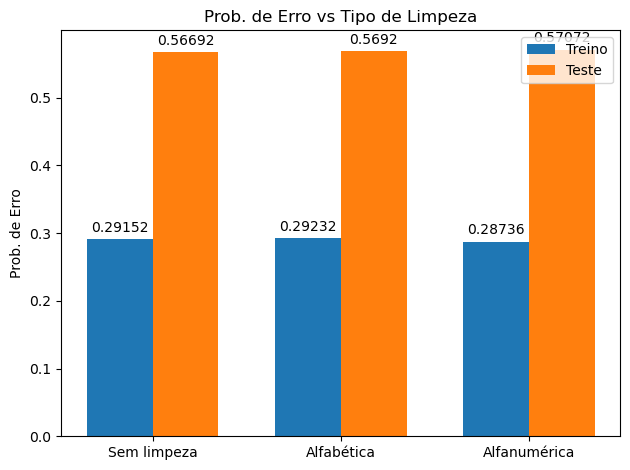

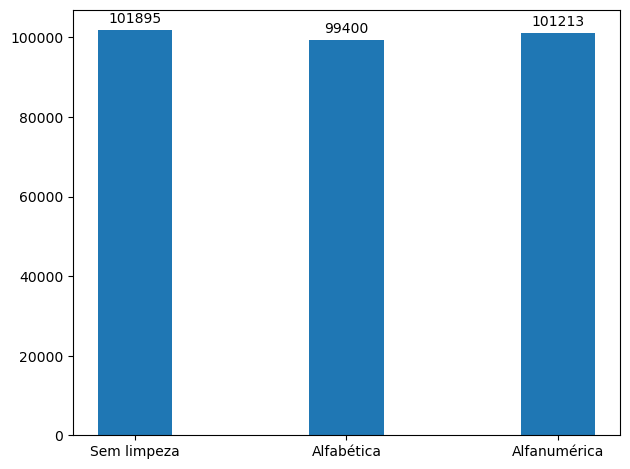

In [50]:
# Comparação dos resultados
labels = tipo
treino = resultados[0]
teste = resultados[1]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, treino, width, label='Treino')
rects2 = ax.bar(x + width/2, teste, width, label='Teste')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prob. de Erro')
ax.set_title('Prob. de Erro vs Tipo de Limpeza')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()



fig, ax = plt.subplots()
rect = ax.bar(labels, dicionarios, width)
ax.set_xticks(x, labels)
ax.bar_label(rect, padding=3)
fig.tight_layout()

plt.show()


In [ ]:
def limpeza(corpus, tipo=None, verbose=False): 

    if tipo == "alfabetica":
        corpus = [re.sub(r'[^a-zA-Z]+', ' ', critica) for critica in corpus]
        corpus = [critica.replace('<br/>', ' ') for critica in corpus]
        corpus = [critica.replace('<br>', ' ') for critica in corpus]

        if verbose: 
            print("\nLimpeza alfabética terminada\n")
    elif tipo == "alfanumerica": 
        corpus = [re.sub(r'[^a-zA-Z0-9]+', ' ', critica) for critica in corpus]
        corpus = [critica.replace('<br/>', ' ') for critica in corpus]
        corpus = [critica.replace('<br>', ' ') for critica in corpus]

        if verbose: 
            print("\nLimpeza alfanumérica terminada\n")
    elif verbose: 
        print("\nSem limpeza\n")

    return corpus

## Testes

#### Para efeitos de testes irei recorrer apenas a 2k amostrados do conjunto de amostras fornecido.

50000
50000
(50000,)


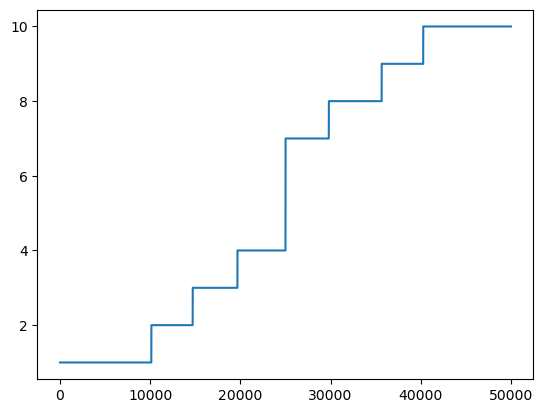

In [ ]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Trabalho Final/imdbFull.p'

D = pickle.load(open(fN, 'rb'))

# print(D.keys())

X = D.data
y = D.target

print(len(X))

corpus = X
# corpus = X[:20000]
# y = y[:20000]

print(len(X))
print(y.shape)

y = y[np.argsort(y)]
plt.plot(y)

        - Limpeza

            - Classificação Binária

CountVectorizer
50000
(50000,)

Sem limpeza

Tamanho do dicionário:  101895
[0 1]
 - Treino
TP 10813
TN 10886
FP 1687
FN 1614
Recall:  0.87
False Alarm Rate:  0.134
Precision:  0.865
F-Score:  0.867


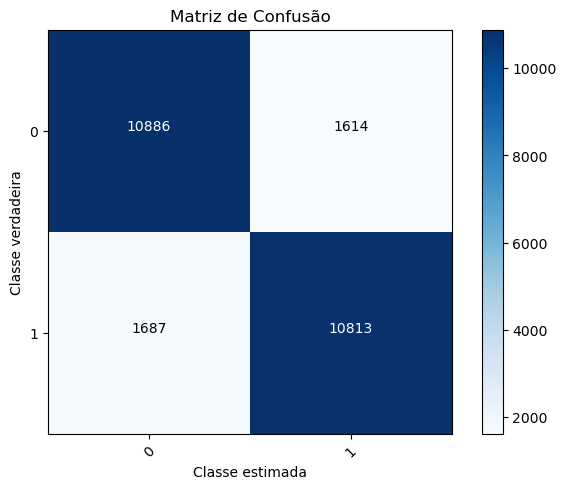


 - Teste
TP 7973
TN 7986
FP 4527
FN 4514
Recall:  0.639
False Alarm Rate:  0.362
Precision:  0.638
F-Score:  0.638


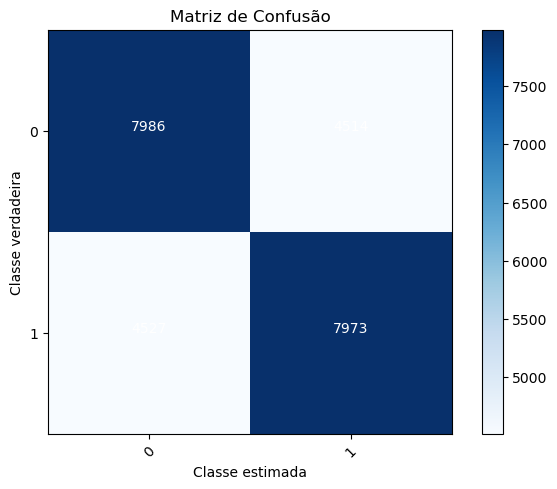

50000
(50000,)

Limpeza alfabética terminada

Tamanho do dicionário:  99400
[0 1]
 - Treino
TP 10678
TN 10857
FP 1822
FN 1643
Recall:  0.867
False Alarm Rate:  0.144
Precision:  0.854
F-Score:  0.86


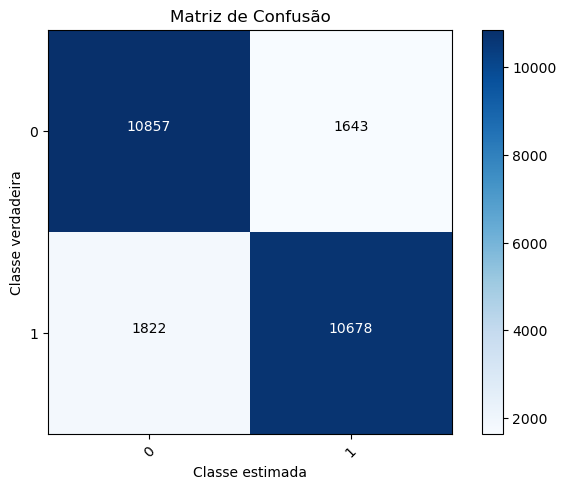


 - Teste
TP 7942
TN 8118
FP 4558
FN 4382
Recall:  0.644
False Alarm Rate:  0.36
Precision:  0.635
F-Score:  0.639


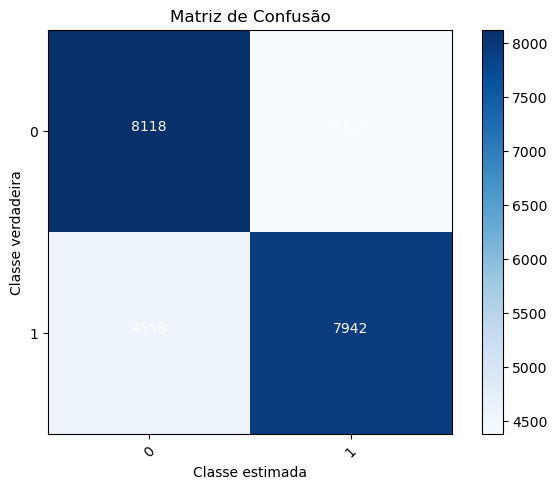

50000
(50000,)

Limpeza alfanumérica terminada

Tamanho do dicionário:  101213
[0 1]
 - Treino
TP 11105
TN 11007
FP 1395
FN 1493
Recall:  0.881
False Alarm Rate:  0.112
Precision:  0.888
F-Score:  0.884


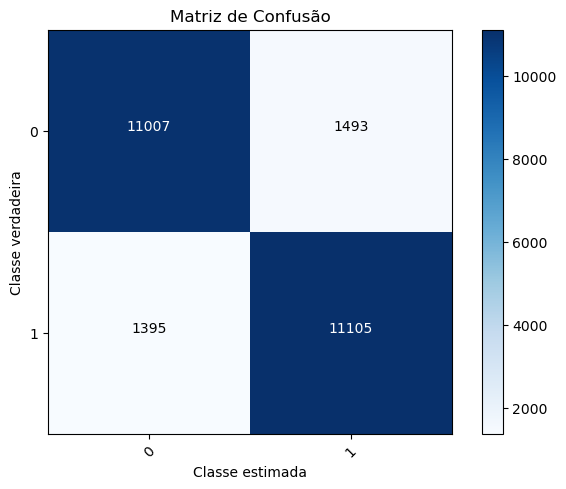


 - Teste
TP 8198
TN 7935
FP 4302
FN 4565
Recall:  0.642
False Alarm Rate:  0.352
Precision:  0.656
F-Score:  0.649


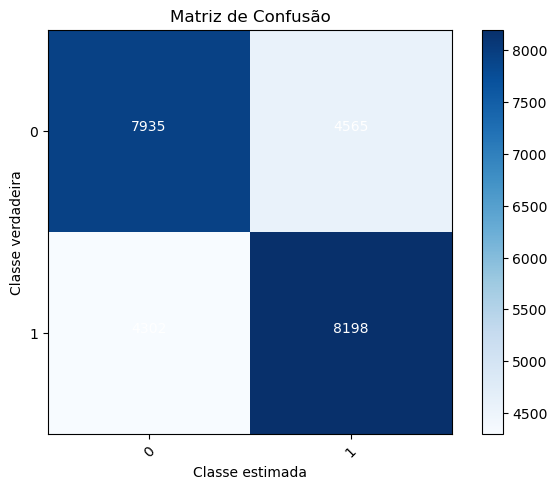




TfidfVectorizer

Sem limpeza

Tamanho do dicionário:  101895
[0 1]
 - Treino
TP 10697
TN 10640
FP 1803
FN 1860
Recall:  0.852
False Alarm Rate:  0.145
Precision:  0.856
F-Score:  0.854


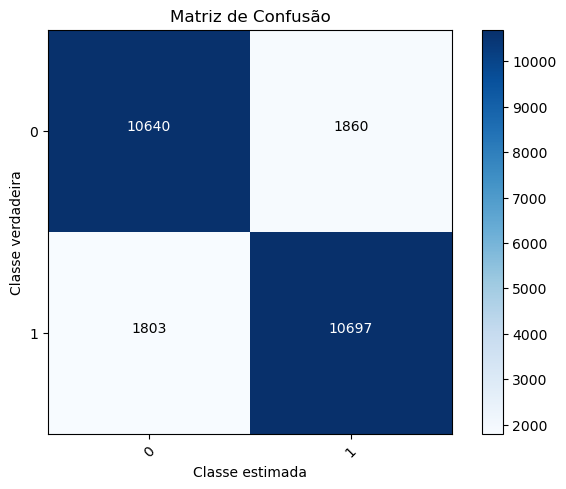


 - Teste
TP 8207
TN 8104
FP 4293
FN 4396
Recall:  0.651
False Alarm Rate:  0.346
Precision:  0.657
F-Score:  0.654


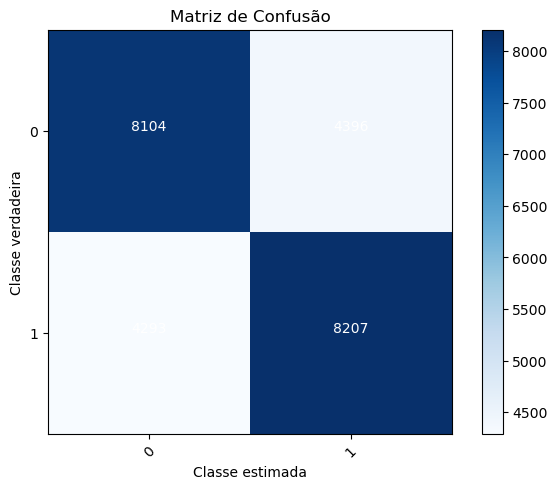


Limpeza alfabética terminada

Tamanho do dicionário:  99400
[0 1]
 - Treino
TP 10723
TN 10650
FP 1777
FN 1850
Recall:  0.853
False Alarm Rate:  0.143
Precision:  0.858
F-Score:  0.855


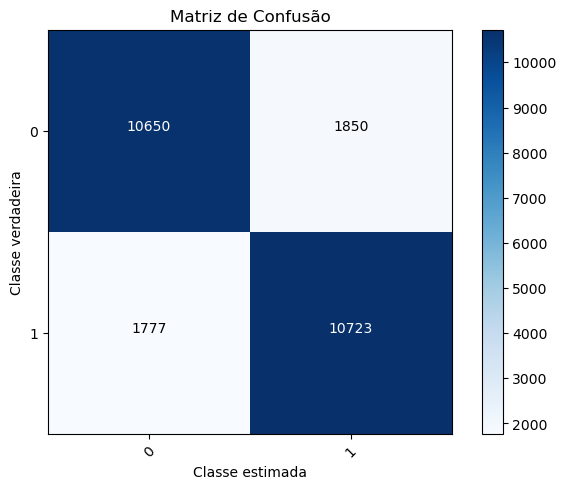


 - Teste
TP 8250
TN 8056
FP 4250
FN 4444
Recall:  0.65
False Alarm Rate:  0.345
Precision:  0.66
F-Score:  0.655


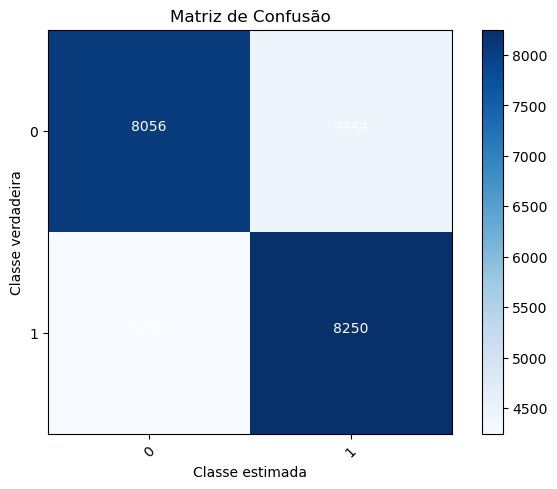


Limpeza alfanumérica terminada



KeyboardInterrupt: 

In [ ]:
tipo_limpeza = [None, "alfabetica", "alfanumerica"]
y = np.array(list(map(lambda i: 0 if i < 5 else 1, y)))


countVectorizer = [[],[]]

print("CountVectorizer")
for tipo in tipo_limpeza:
    corpus = X
    classes = y

    print(len(corpus))
    print(y.shape)
    corpus = limpeza(corpus, tipo=tipo, verbose=True)
    cv = CountVectorizer().fit(corpus)
    vocabulary = cv.get_feature_names_out()
    print("Tamanho do dicionário: ", len(vocabulary))
    corpusVect = cv.transform(corpus)

    print(np.unique(classes))

    X1, X2, y1, y2 = train_test_split(corpusVect, classes, test_size=0.5, shuffle=True, stratify=classes)

    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X1, y1)
    y1e = lr.predict(X1)
    y2e = lr.predict(X2)

    print(" - Treino")
    countVectorizer[0].append([avaliacaoBinaria(y1, y1e, verbose=True)])
    
    print("\n - Teste")
    countVectorizer[1].append([avaliacaoBinaria(y2, y2e, verbose=True)])
    
tfidfVectorizer = [[],[]]

print("\n\n\nTfidfVectorizer")
for tipo in tipo_limpeza:
    corpus = X
    classes = y

    corpus = limpeza(corpus, tipo=tipo, verbose=True)
    tf = TfidfVectorizer().fit(corpus)
    vocabulary = tf.get_feature_names_out()
    print("Tamanho do dicionário: ", len(vocabulary))
    corpusVect = tf.transform(corpus)

    print(np.unique(classes))

    X1, X2, y1, y2 = train_test_split(corpusVect, classes, test_size=0.5, shuffle=True, stratify=classes)

    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X1, y1)
    y1e = lr.predict(X1)
    y2e = lr.predict(X2)

    print(" - Treino")
    tfidfVectorizer[0].append([avaliacaoBinaria(y1, y1e, verbose=True)])
    
    print("\n - Teste")
    tfidfVectorizer[1].append([avaliacaoBinaria(y2, y2e, verbose=True)])


          - Classificação Multiclasse